In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="white")

# Introd

In [28]:
x = np.random.uniform(0,1,10)
x.shape

(10,)

(-0.5, 9.5, 0.5, -0.5)

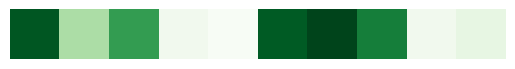

In [35]:
plt.imshow(x[np.newaxis], cmap='Greens')
plt.axis('off')

This is a sequence of random variables following the uniform distributions


In [53]:
def sample_uniform_random_vector(m, n):
    """
    m : number of random vectors 
    n : size of random vector 
    """
    rv = []
    for i in range(m):
        x = np.random.uniform(0,1,n)
        e = x / np.sum(x)
        rv.append(e)
    return rv 

(-0.5, 9.5, 4.5, -0.5)

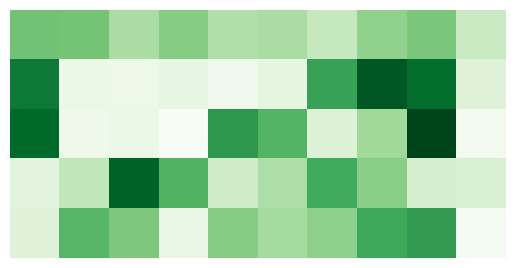

In [54]:
rv = sample_uniform_random_vector(5, 10)
plt.imshow(rv, cmap='Greens')
plt.axis('off')

(-0.5, 4.5, 0.5, -0.5)

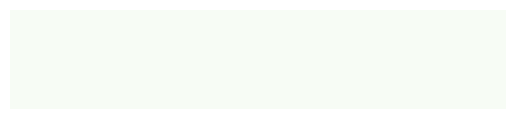

In [56]:
plt.imshow(np.sum(rv, axis=1)[np.newaxis], cmap='Greens')
plt.axis('off')

All sum to one

<AxesSubplot: ylabel='Count'>

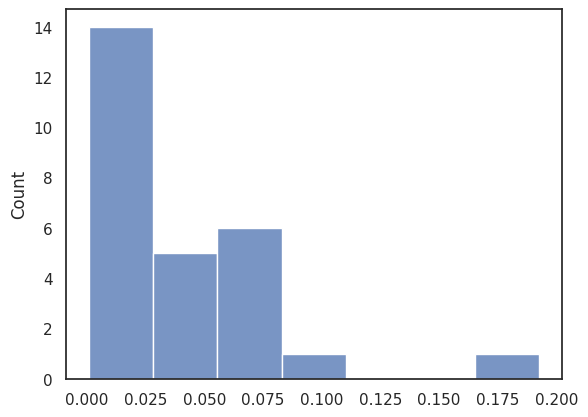

In [10]:
dist = """1 a 0.0575,
2 b 0.0128,
3 c 0.0263,
4 d 0.0285,
5 e 0.0913,
6 f 0.0173,
7 g 0.0133,
8 h 0.0313,
9 i 0.0599,
10 j 0.0006,
11 k 0.0084,
12 l 0.0335,
13 m 0.0235,
14 n 0.0596,
15 o 0.0689,
16 p 0.0192,
17 q 0.0008,
18 r 0.0508,
19 s 0.0567,
20 t 0.0706,
21 u 0.0334,
22 v 0.0069,
23 w 0.0119,
24 x 0.0073,
25 y 0.0164,
26 z 0.0007,
27 _ 0.1928"""
dist = [x.replace('\n','').split(' ')[1:] for x in dist.split(',')]
characters = [x[0] for x in dist]
character_prob = np.array([float(x[1]) for x in dist])

sns.histplot(character_prob)

In [11]:
np.sum(character_prob)

1.0002

Begin by visulaising this probablity distriubtion, darker green means more probable. 

$$p(x)$$

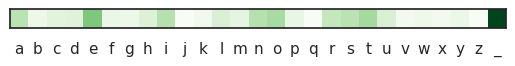

In [20]:
plt.imshow(character_prob[np.newaxis], cmap='Greens')
plt.yticks([])
plt.xticks(np.arange(len(characters)), characters)
plt.show()

Space is very common (far left) a, and e show up strong in the first 5. 


Now the join (assuming independence, which isn't true but I don't have the data for true independence) is 

$$p(x,y)$$

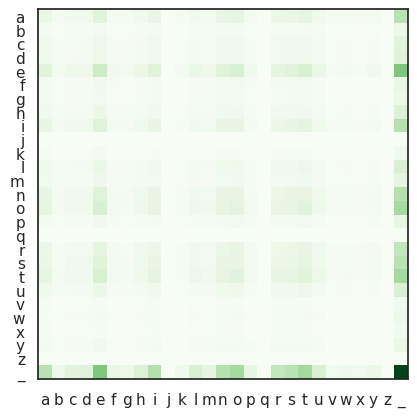

In [23]:
p_xy = character_prob[np.newaxis, :] * character_prob[:,np.newaxis]
plt.imshow(p_xy, cmap='Greens')
plt.yticks(np.arange(len(characters)), characters)
plt.xticks(np.arange(len(characters)), characters)
plt.show()

The marginal probabliity can be obtained with the sum rule:

$$p(x) = \sum_{y}p(x,y)$$

The conditional probability can be obtained with the product rule:

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

These are the two most important formulas in probability, as everything else is derived from them 


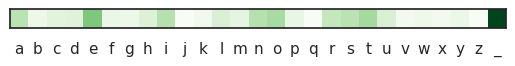

In [34]:
# conditional probablity example. 
p_x_ya = p_xy[0] 
plt.imshow(p_x_ya[np.newaxis], cmap='Greens')
plt.yticks([])
plt.xticks(np.arange(len(characters)), characters)
plt.show()

# Two types of prob calculation

Forward probabilities. Given a generative model, predict outcome.

Inverse probabilites. GIven outcomes, predict generative model

Exzmple. An urn contains K balls, of which B are black and W = K - B are white. Fred draws a ball at random from the urn and replaces it, N times. 

(a) What is the probablity distributions of the number of times a black ball is drawn $n_b$?

probabliity distribution is sampling with replacement so binomial distribution

(b) What is the expectation of $n_b$? What is the variance of $n_b$? awhat is the standard deviation of $n_b$? Give numerical answers for the cases n=5, n=400, when b=2 and k=10

In [42]:
B = 2
K = 10

for N in [5,400]: 
    draws = np.random.binomial(n=N, p=B/(K-B), size=1)
    print(draws)

[1]
[102]
